In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [15]:
df = load_digits()
X = df.data
y = df.target

In [16]:
X.shape

(1797, 64)

In [17]:
y.shape

(1797,)

In [19]:
base_decision_tree = DecisionTreeClassifier()
base_score = cross_val_score(base_decision_tree, X, y, cv=10).mean()
print(base_score)

0.828159237233908


In [20]:
with open('ans_1.txt', 'w') as out:
    out.write(str(base_score))

In [22]:
from sklearn.ensemble import BaggingClassifier

base_bagging = BaggingClassifier(n_estimators=100)
base_bagging_score = cross_val_score(base_bagging, X, y, cv=10).mean()
print(base_bagging_score)

0.9227171360998684


In [23]:
with open('ans_2.txt', 'w') as out:
    out.write(str(base_bagging_score))

In [27]:
n_features = int(round(np.sqrt(X.shape[1])))
random_features_bagging = BaggingClassifier(n_estimators=100,
                                            max_features=n_features)
random_features_bagging_score = cross_val_score(random_features_bagging, X, y, cv=10).mean()
print(random_features_bagging_score)

0.9398988687515096


In [42]:
random_features_bagging_1 = BaggingClassifier(n_estimators=100,
                                            max_features=50)
random_features_bagging_1_score = cross_val_score(random_features_bagging_1, X, y, cv=10).mean()
print(random_features_bagging_1_score)

0.942213056483002


In [28]:
with open('ans_3.txt', 'w') as out:
    out.write(str(random_features_bagging_score))

In [29]:
n_features = int(round(np.sqrt(X.shape[1])))
random_trees_bagging = BaggingClassifier(DecisionTreeClassifier(max_features=n_features),
                                         n_estimators=100)
random_trees_bagging_score = cross_val_score(random_trees_bagging, X, y, cv=10).mean()
print(random_trees_bagging_score)

0.9511497964090431


In [30]:
with open('ans_4.txt', 'w') as out:
    out.write(str(random_trees_bagging_score))

In [31]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest_score = cross_val_score(random_forest, X, y, cv=10).mean()
print(random_forest_score)

0.9555709716147247


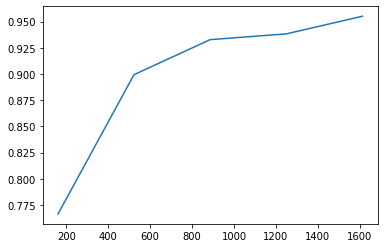

In [34]:
from sklearn.model_selection import learning_curve

samples, _, results = learning_curve(random_forest, X, y, cv=10)
plt.plot(samples, results.mean(1))

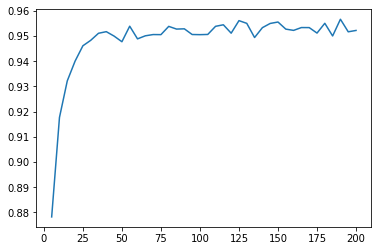

In [41]:
n_trees = np.linspace(5, 200, 40).astype('int')
scores = [cross_val_score(RandomForestClassifier(n_estimators=n),
                          X, y, cv=10).mean() for n in n_trees]
plt.plot(n_trees, scores)

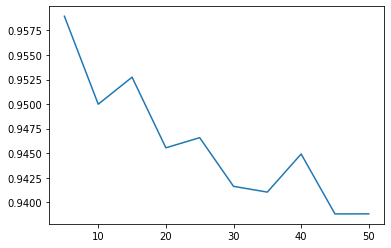

In [47]:
n_features = np.linspace(5, 50, 10).astype('int')
scores = [cross_val_score(RandomForestClassifier(n_estimators=100,
                                                 max_features=n),
                          X, y, cv=10).mean() for n in n_features]
plt.plot(n_features, scores)

In [48]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
random_forest_score = cross_val_score(random_forest, X, y, cv=10).mean()
print(random_forest_score)

0.9115437469069398
